<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/homework-1/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 3


In [276]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
#from google.colab import drive
#drive.mount('/content/drive')

w0, w1, w2 = 1, 0, 1
v0,v1,v2 = 0,0,0
best_w0, best_w1, best_w2 = w0, w1, w2

temp0,temp1,temp2 = 1,0,1

x1, x2, y = [], [], []
x1_test,x2_test,y_test = [],[],[]

In [277]:
## Code from the hw-1 file


## Generates N random points for a given linear separator w
## if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded
def generate_pla(N,name,w0=0,w1=1,w2=1):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-10,10)
        y_step = w0 + w1*x1 + w2*x2
        if(y_step == 0):
            continue
        X1.append(x1)
        X2.append(x2)
        if(y_step > 0):
            Y.append(1)
        elif(y_step < 0):
            Y.append(-1)
        n += 1
    data = [np.array([1,X1[i],X2[i],Y[i]]) for i in range(N)]
    df = pd.DataFrame(data)
    df.drop([0], axis = 1, inplace=True)
    df.columns = ['x1', 'x2', 'y']

    df.to_csv(name, index=False)
    return data

f_w0, f_w1, f_w2 = 1, 1, 1
generate_pla(100,'synthetic_dataset.csv', f_w0, f_w1, f_w2)
generate_pla(10000,'synthetic_dataset_test.csv', f_w0, f_w1, f_w2)




[array([ 1.        , -0.78770078,  9.85866045,  1.        ]),
 array([1.        , 6.01445825, 3.47201542, 1.        ]),
 array([1.        , 3.95373014, 5.0463537 , 1.        ]),
 array([ 1.        , -2.82289345, -9.80413274, -1.        ]),
 array([ 1.        , -7.47909262,  8.86763366,  1.        ]),
 array([ 1.        , -6.78049663, -8.19420448, -1.        ]),
 array([1.        , 2.83028703, 2.24142093, 1.        ]),
 array([ 1.        , -1.8144002 , -9.83009377, -1.        ]),
 array([ 1.        ,  7.71664407, -1.5468393 ,  1.        ]),
 array([ 1.        , -6.12567534,  0.69779924, -1.        ]),
 array([ 1.        , -9.91953859, -6.72159618, -1.        ]),
 array([ 1.        ,  8.78591928, -3.22548472,  1.        ]),
 array([ 1.        , -7.14433583,  5.4995442 , -1.        ]),
 array([ 1.        ,  5.83980805, -1.25510357,  1.        ]),
 array([1.        , 4.96487016, 3.16943879, 1.        ]),
 array([ 1.        ,  1.01469779, -0.03571269,  1.        ]),
 array([1.        , 1.18

In [278]:
def file_read(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(float(values[2]))
    return x1,x2,y

def file_read_test(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1_test.append(float(values[0]))
            x2_test.append(float(values[1]))
            y_test.append(float(values[2]))
    return x1_test,x2_test,y_test


In [279]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

def PLA(n, weight_limit=1e30):
    global w0, w1, w2
    for iteration in range(1000):
        misclassified = misclassified_points()
        if not misclassified:
            break

        for x1_misclassified, x2_misclassified, y_misclassified in misclassified:
            signal = w0 + w1 * x1_misclassified + w2 * x2_misclassified
            if y_misclassified * signal <= 1:
                w0 += n * (y_misclassified - signal)
                w1 += n * (y_misclassified - signal) * x1_misclassified
                w2 += n * (y_misclassified - signal) * x2_misclassified

        if abs(w0) > weight_limit or abs(w1) > weight_limit or abs(w2) > weight_limit:
            print("weights approaching infinity so update is termninated")
            break





In [280]:
def calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2):
    num_samples = len(x1_test)
    misclassified = 0

    for i in range(num_samples):
        x1_sample, x2_sample = x1_test[i], x2_test[i]
        signal = w0 + w1 * x1_sample + w2 * x2_sample

        prediction = 1 if signal >= 0 else -1

        if prediction != y_test[i]:
            misclassified += 1

    error_percentage = (misclassified / num_samples) * 100.0
    return error_percentage





#A)

weights approaching infinity so update is termninated
Weights obtained for n = 100 --> w0:  -2.478890291172884e+31    w1: 1.812060344132304e+32    w2:  -1.5166937487798271e+32
Error Percentage on Test Data: 46.87%


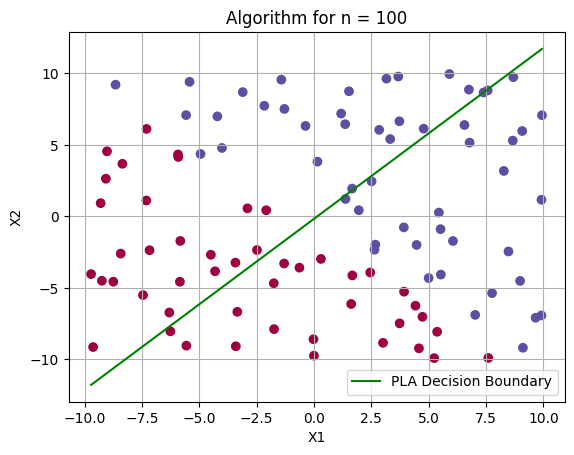

In [281]:
file_read('synthetic_dataset.csv')
file_read_test('synthetic_dataset_test.csv')
PLA(100)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm for n = 100')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 100 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()


#B)

weights approaching infinity so update is termninated
Weights obtained for n = 1 --> w0:  1.2005974643738392e+30    w1: 1.7188370388634235e+30    w2:  8.672694885700851e+30
Error Percentage on Test Data: 20.14%


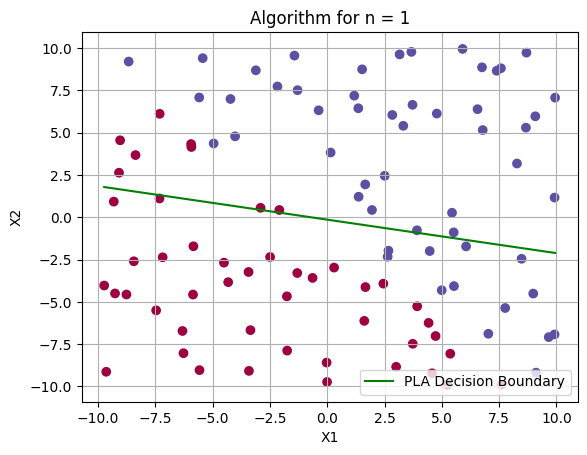

In [282]:

w0, w1, w2 = 1, 0, 1
PLA(1)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm for n = 1')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 1 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()





#C)

Weights obtained from n = 0.01 --> w0:  0.62534284050989    w1: 0.7597774094377671    w2:  0.7889460468826713
Error Percentage on Test Data: 0.99%


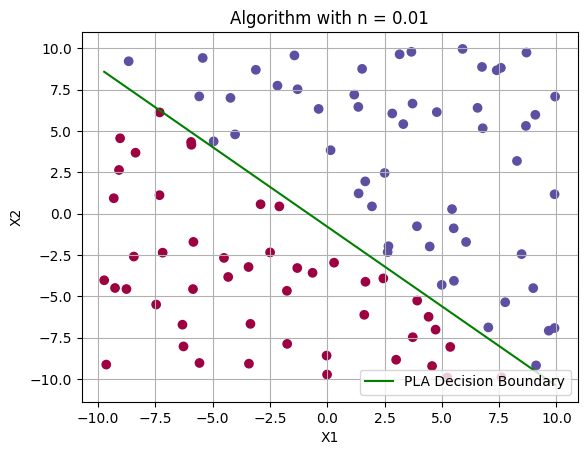

In [283]:
w0, w1, w2 = 1, 0, 1
PLA(0.01)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm with n = 0.01')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from n = 0.01 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()


#D)

Weights obtained for n = 0.0001 --> w0:  0.851162088369019    w1: 0.6709352691322878    w2:  0.6620235971126516
Error Percentage on Test Data: 1.30%


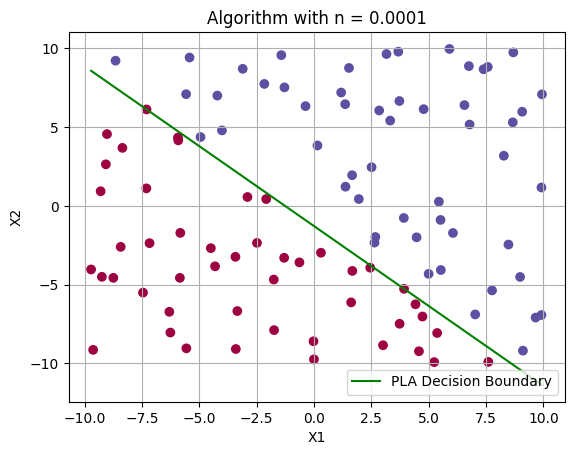

In [284]:
w0, w1, w2 = 1, 0, 1
PLA(0.0001)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Algorithm with n = 0.0001')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 0.0001 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()

#E)

the n value is the learning rate in this case. A high learning rate implies that the weights converge quicker, but it is also susceptible to greater error as each update moves the line by a substantial amount. for the learning rate values of 100 and 1 we can observe this. As we reduce the learning rate to 0.01 and 0.0001, the incremental updates for each weights are much more precise, and with the right amount of iterations, we will converge at an ideal value for the weights. since the number of iterations we are using for this problem is 1000, we can see that the least error percentage is obtained at lower learning rates. The same might not be observed for lower iterations. In general though, for lower learning rates, and a high amount of iterations, we will get the lowest error rate.